In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

## Extração dos dados

Realiza a leitura do data.frame informado pelo professor.

In [2]:

url = 'https://raw.githubusercontent.com/EduPekUfpr/MNUM-7124/main/Data/doencasMentais.csv'

df = pd.read_csv(url)
df.head(5)

,Genero,Doenca,Idd
0,M,esquizofrenia,24.1
1,M,esquizofrenia,13.7
2,M,esquizofrenia,19.6
3,M,esquizofrenia,20.0
4,M,esquizofrenia,11.8


Sumariza os dados, para identificar possíveis problemas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genero  944 non-null    object 
 1   Doenca  944 non-null    object 
 2   Idd     944 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.3+ KB


Não há nulos, não havendo preocupação com isto. Sabe-se, pelo mencionado em aula, que as variáveis textuais possuem alguns valores fora de padrão.

In [4]:
df['Doenca'].drop_duplicates()

0      esquizofrenia
199        Depressao
398     Bipolaridade
598    Esquizofrenia
Name: Doenca, dtype: object

Percebe-se que será necessário corrigir 'esquizofrenia' para se juntar a 'Esquizofrenia'.

In [5]:
df['Genero'].drop_duplicates()

0      M
199    F
Name: Genero, dtype: object

Não há problemas na variável 'Genero'.

Quanto à variável numérica, deve-se verificar a variabilidade dos dados.

<Axes: >

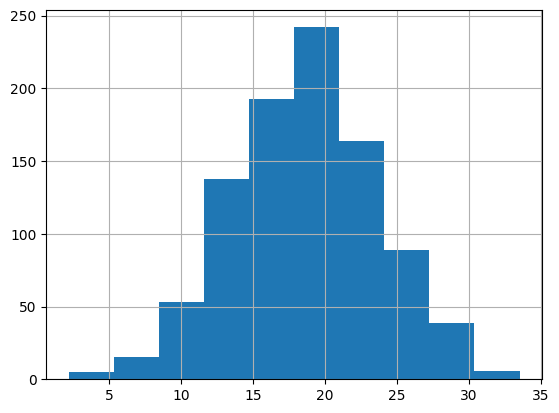

In [6]:
df['Idd'].hist()

Como parecem seguir normalidade, não se faz necessárias manipulações ou demais análises criterioras.

## Tratamento dos dados

Como mencionado anteriormente, será necessário apenas:

* Corrigir a variável doenca, para evitar nomes incosistentes.

In [7]:

# Copia o data.frame
data = df.copy()

# Corrige a doenca para minuscula
data['Doenca'] = df['Doenca'].str.lower()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genero  944 non-null    object 
 1   Doenca  944 non-null    object 
 2   Idd     944 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.3+ KB


## Visualização

Por fim, pode-se construir a visualização dos dados.

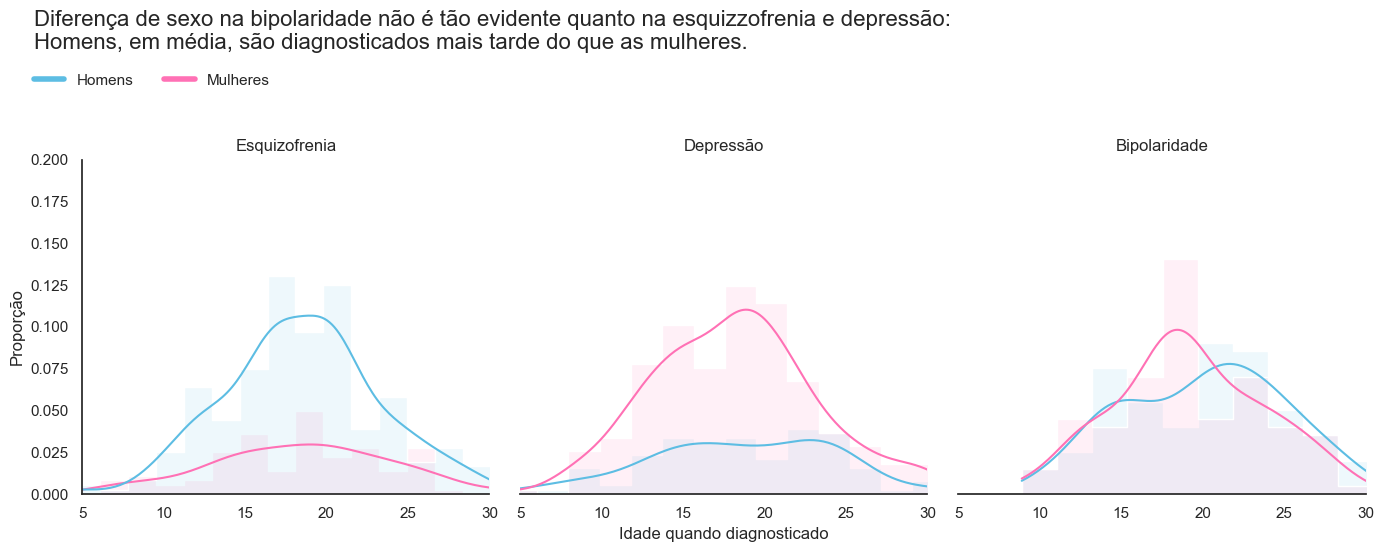

In [8]:


# Define the background
sns.set(style='white')

# Set up classes
doencas = list(data['Doenca'].drop_duplicates())

# Set up grid
fig, axes = plt.subplots(1, len(doencas), figsize=(14, 5))

# Set up my pallete
palette = {
    'F': '#FF71B5',     # Cinza
    'M': '#5DBDE3'      # Azul
}

# Create one chart for each class
for j, doenca in enumerate(doencas):

    # Point to axes
    ax = axes[j]

    # Create a histogram
    sns.histplot(
            data=data[(data['Doenca'] == doenca)], # With just the data from class 
            x='Idd',
            hue='Genero', 
            palette=palette,    # Use my custom pallete
            kde=True,           # To plot the curve
            edgecolor=None,     # Remove edges from the histogram
            alpha=0.1,          # Adjust histogram to be more transparent
            stat='proportion',
            element='step', 
            ax=ax,              # Use the axes pointed
            legend=False        # Remove legend
            )
    
    # To turn all classes in the same proportion
    ax.set_ylim(0, 0.2)
    ax.set_xlim(5, 30)
    
    # Remove labels
    ax.set_title('')
    ax.set_ylabel('')
    ax.set_xlabel('')

    # Set friendly titles
    ax.set_title(doenca.capitalize().replace('ssao', 'ssão'))
    
    # Remove lines from the axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Mantain only the tick labels of the first chart
    if j != 0:
        ax.set_yticklabels([])

    # Mantain only the left axis line and label for the first chart
    if j == 0:
        ax.spines['left'].set_visible(True)
        ax.set_ylabel('Proporção')

    # Set the x label for the second chart (center)
    if j == 1:
        ax.set_xlabel('Idade quando diagnosticado')


# Create a custom legend
custom_lines = [
    plt.Line2D([0], [0], color=palette['M'], lw=4, label='Homens'),
    plt.Line2D([0], [0], color=palette['F'], lw=4, label='Mulheres')
]

# Add an image legend
fig.legend(handles=custom_lines, 
           loc='upper left', 
           ncol=len(custom_lines),
           bbox_to_anchor=(0.02, 1), 
           frameon=False
           )

# Add an image title
fig.suptitle(
    "Diferença de sexo na bipolaridade não é tão evidente quanto na esquizzofrenia e depressão:\n"
    "Homens, em média, são diagnosticados mais tarde do que as mulheres.", 
    fontsize=16, 
    x=0.03, 
    y = 1.1, 
    horizontalalignment='left'
    )

# Fix layout
plt.tight_layout()

# Force showing
plt.show()
